# <font style="color:rgb(50,120,229)">Contours </font>
Contours are simply the boundaries of an object or part of object in an image. They are useful in shape analysis and object Detection/Recognition using traditional Computer Vision algorithms.

You can do a lot of analysis based on contours to arrive at a solution to many computer vision problems. 

In this Notebook, we will discuss many different aspects of Contour Analysis. Let's get started.

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Load an image and display </font>

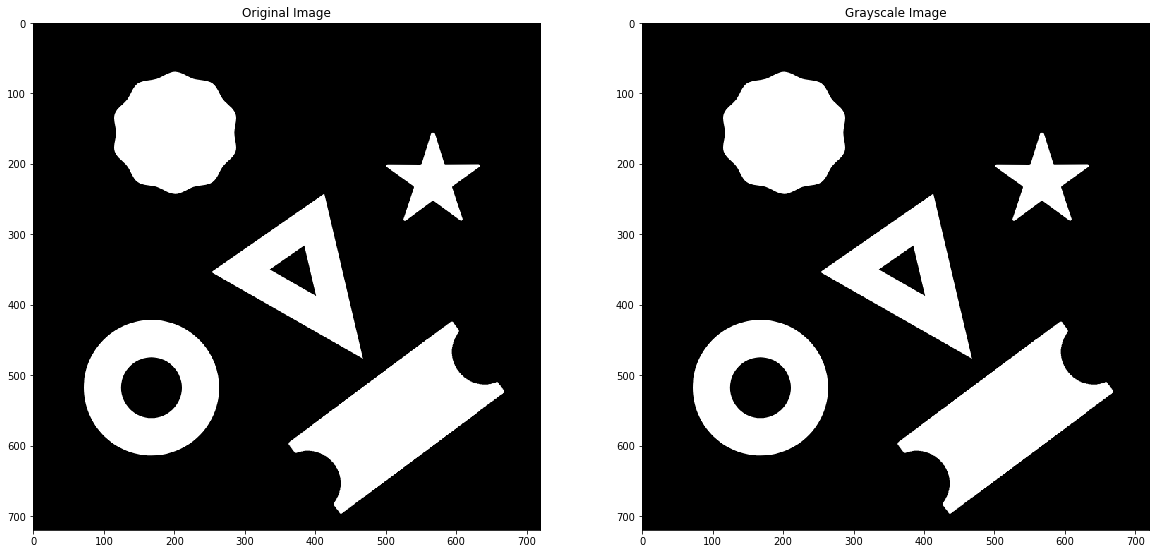

In [3]:
imagePath = DATA_PATH + "images/Contour.png"
image = cv2.imread(imagePath)
imageCopy = image.copy()
# Convert to grayscale
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


# Display image
plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title("Original Image");
plt.subplot(122)
plt.imshow(imageGray)
plt.title("Grayscale Image");

# <font style="color:rgb(50,120,229)">How to find Contours</font>
We have seen earlier that there are many algorithms for finding Contours. We will use the OpenCV function [**`findContours`**](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) to get the boundaries of the objects displayed above.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
contours, hierarchy	=	cv.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

Where,


- **`image`**	- input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. 
- **`contours`** - Detected contours. Each contour is stored as a vector of points.
- **`hierarchy`** - Optional output vector containing information about the image topology. It has been described in detail in the video above.
- **`mode`** - Contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )
- **`method`** - Contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1 etc )
- **`offset`** - Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

In [4]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
print("Number of contours found = {}".format(len(contours)))
print("\nHierarchy : \n{}".format(hierarchy))

Number of contours found = 7

Hierarchy : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


# <font style="color:rgb(50,120,229)">Drawing Contours</font>
Contours are simply an array of pixel locations. Let's draw the contours on the boundary of the objects. 

In [6]:
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

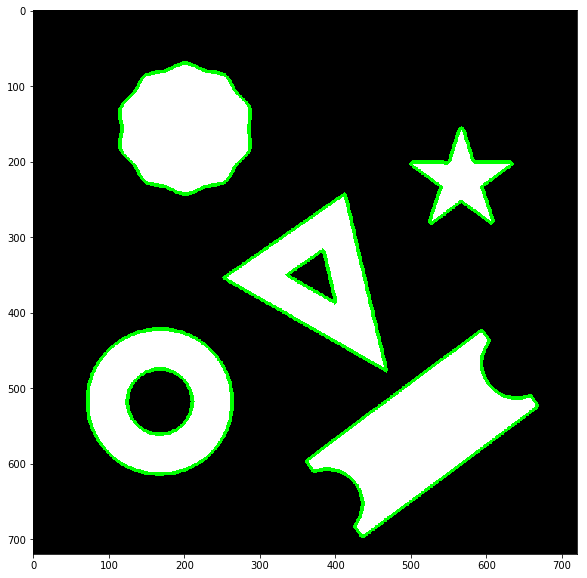

In [7]:
plt.imshow(image[:,:,::-1])

Note that both the inner and outer contours have been detected.

What if we only want to detect the outer contours? We can use `cv2.RETR_EXTERNAL` mode while calling `cv2.findContours` function.

Number of contours found = 5


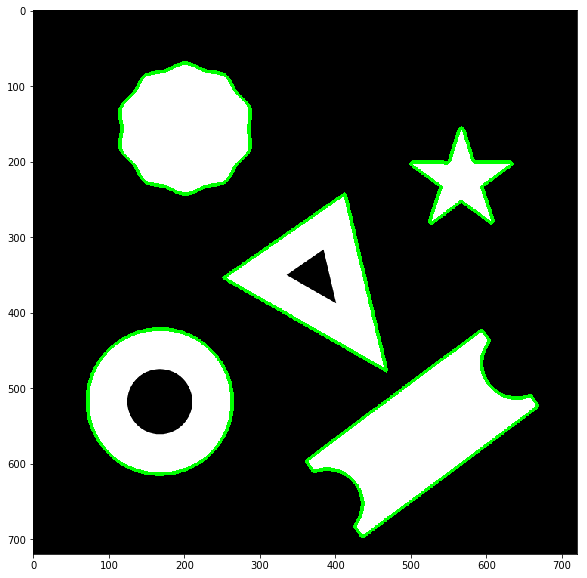

In [8]:
# Find external contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = {}".format(len(contours)))
image = imageCopy.copy()
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

plt.imshow(image[:,:,::-1])

In [9]:
# Draw only the 3rd contour
# Note that right now we do not know
# the numbering of contour in terms of the shapes
# present in the figure
image = imageCopy.copy()
cv2.drawContours(image, contours[2], -1, (0,0,255), 3);

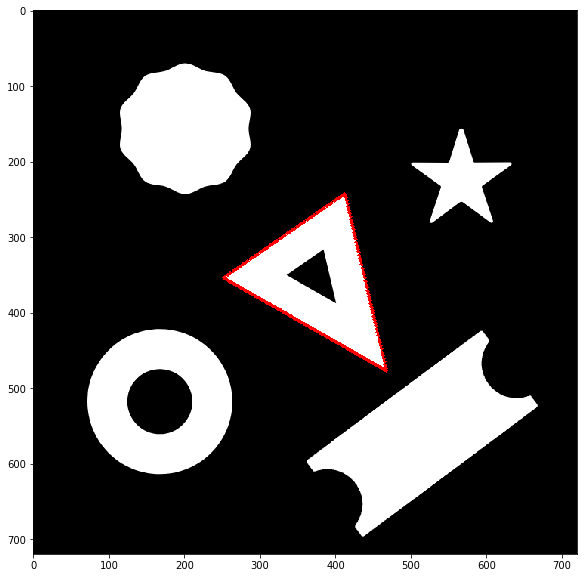

In [10]:
plt.imshow(image[:,:,::-1])

# <font style="color:rgb(50,120,229)">Contour Properties</font>
Once you have detected the contours from an image, it becomes very easy to do further analysis on the basis of various properties of contours. Let us discuss a few useful properties of contours.

## <font style="color:rgb(50,120,229)">Center of Mass or Centroid</font>
Let us find the center of mass for each contour.

In [11]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

In [12]:
for cnt in contours:
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(image, (x,y), 10, (255,0,0), -1);

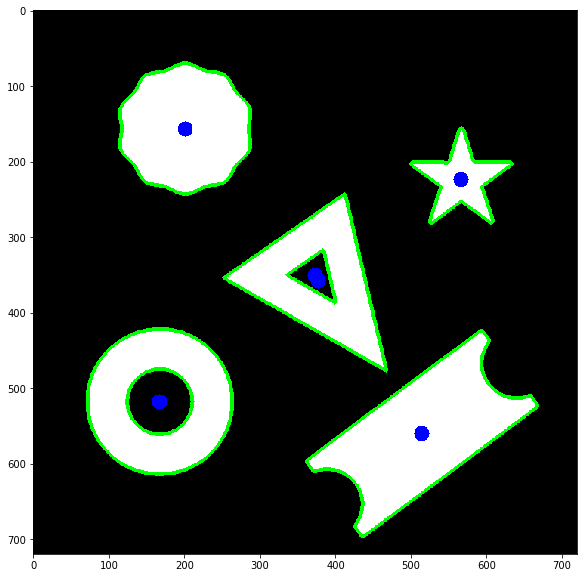

In [13]:
plt.imshow(image[:,:,::-1])

For some shapes, you can see that multiple points were marked, can you figure out why? Plot contours one by one and see what are the various contours detected.

In [14]:
for index,cnt in enumerate(contours):
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(image, (x,y), 10, (255,0,0), -1);
    
    # Mark the contour number
    cv2.putText(image, "{}".format(index + 1), (x+40, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2);

imageCopy = image.copy()

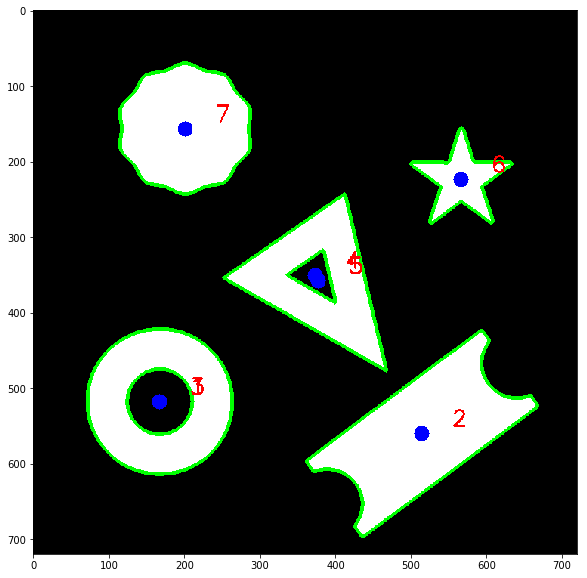

In [15]:
plt.imshow(image[:,:,::-1])

Note that contours 2, 4 and 5, 6 have centers very close to each other. Note their shapes and see if you can derive any observation.

## <font style="color:rgb(50,120,229)">Area and Perimeter</font>

In [16]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 5797.0 and perimeter = 285.0782080888748
Contour #2 has area = 31898.0 and perimeter = 938.8813602924347
Contour #3 has area = 28977.5 and perimeter = 635.369619846344
Contour #4 has area = 2002.0 and perimeter = 216.4507908821106
Contour #5 has area = 21896.5 and perimeter = 728.707710981369
Contour #6 has area = 6214.5 and perimeter = 525.1442201137543
Contour #7 has area = 22854.0 and perimeter = 579.3279893398285


## <font style="color:rgb(50,120,229)">Bounding Boxes</font>

There are 2 type of bounding boxes we can create around a contour:

1. A vertical rectangle
2. A rotated rectangle - This is the bounding box with the minimum area

In [17]:
image = imageCopy.copy()
for cnt in contours:
    # Vertical rectangle
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,255), 2)

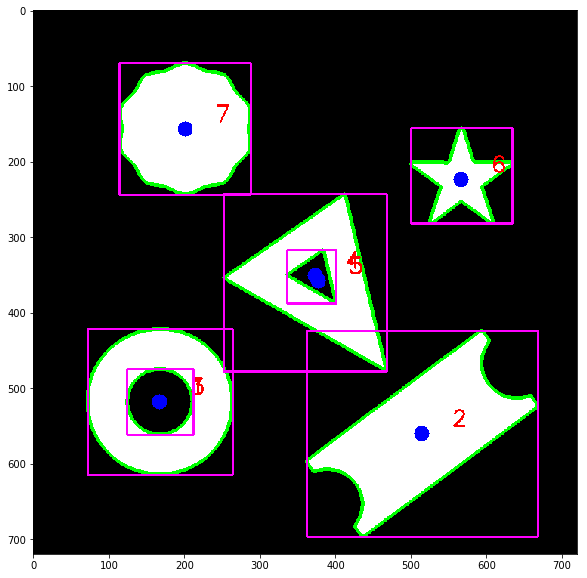

In [18]:
plt.imshow(image[:,:,::-1])

In [19]:
image = imageCopy.copy()
for cnt in contours:
    # Rotated bounding box
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    # Use drawContours function to draw 
    # rotated bounding box
    cv2.drawContours(image, [boxPts], -1, (0,255,255), 2)

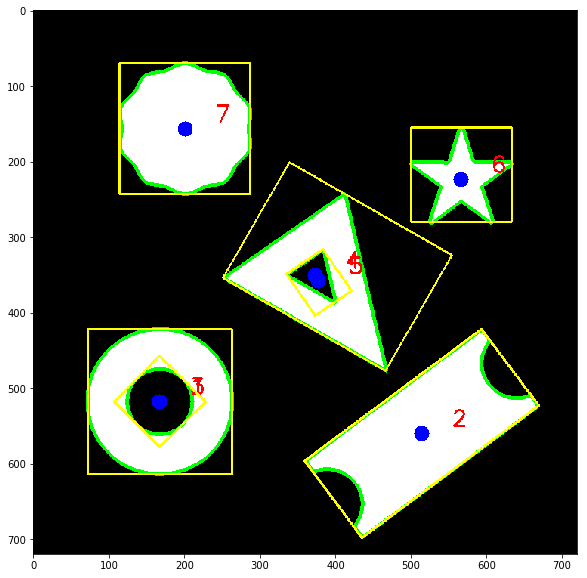

In [20]:
plt.imshow(image[:,:,::-1])

## <font style="color:rgb(50,120,229)">Fit a circle and ellipse</font>

Fitting a bounding box (vertical or rotated) is the preferred choice in most cases but in cases where you are only dealing with circles or ellipses, fitting a circle and/or an ellipse is a much better choice.

Let's see how we can do it.

In [21]:
image = imageCopy.copy()
for cnt in contours:
    # Fit a circle
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(x),int(y)), int(round(radius)), (125,125,125), 2)

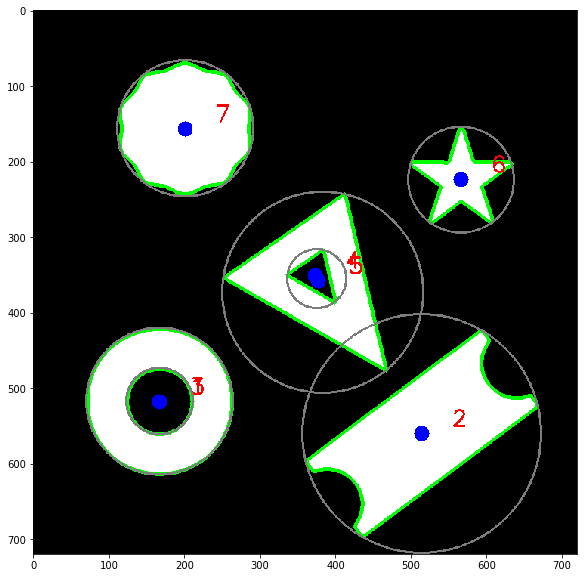

In [22]:
plt.imshow(image[:,:,::-1])

In [23]:
image = imageCopy.copy()
for cnt in contours:
    # Fit an ellipse
    # We can fit an ellipse only
    # when our contour has minimum
    # 5 points
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image, ellipse, (255,0,125), 2)

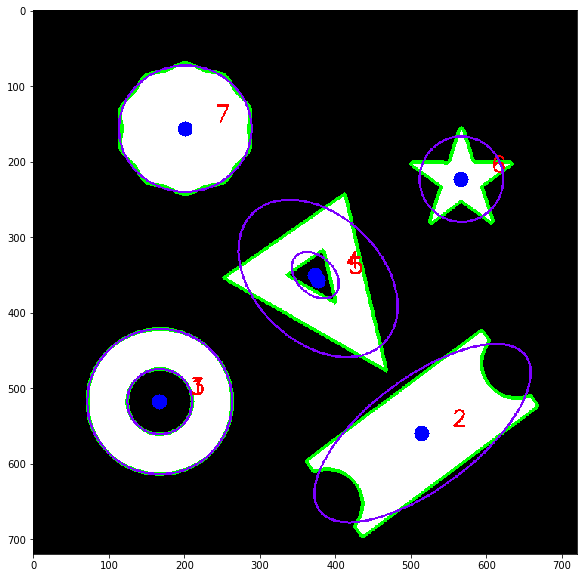

In [24]:
plt.imshow(image[:,:,::-1])